# Assignment 7

## 1. Unit Testing in Python

### Problem 1

First, I created factor.py file with the function in it.

In [7]:
def smallest_factor(n):
    """Return the smallest prime factor of the positive integer n."""
    if n == 1: return 1
    for i in range(2, int(n**.5)):
        if n % i == 0: return i
    return n

Then, I wrote the test_factor.py file.

In [8]:
import factor

def test_factor1():
    assert factor.smallest_factor(25) == 5, "failed on square of prime numbers"

def test_factor2():
    assert factor.smallest_factor(8) == 2, "failed on small positive integers"

I found that in this function, the range function will not include int(n**.5) when the loop runs. Thus, I think there are two cases that the function will not execute correctly. First of all, for all numbers that are the square of a prime number, the for loop cannot catch the factor, since the square root of it will not be tested. Secondly, when the testing number is small, the for loop will not execute, since range(2, 2) is empty. Thus, any number that is less than 9 will return itself as the result. Thus, I choose 25 and 8 to be the testing numbers. And the result is the following:

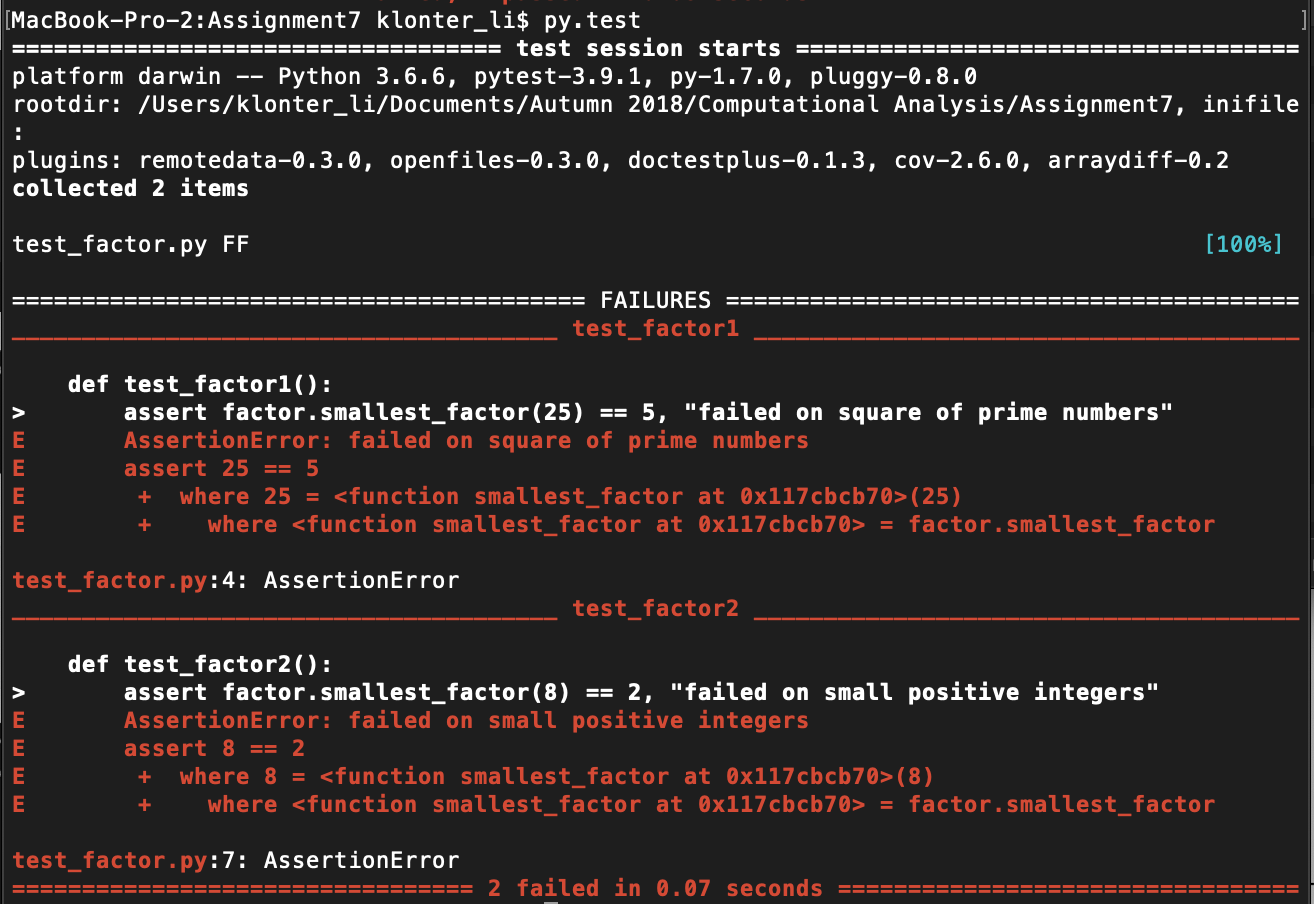

In [10]:
from IPython.display import Image
Image(filename = 'FactorTest.png') 

The corrected version of the function will be the following:

In [4]:
 def smallest_factor(n):
    """Return the smallest prime factor of the positive integer n."""
    if n == 1: return 1
    for i in range(2, int(n**.5) + 1):
        if n % i == 0: return i
    return n

### Problem 2

I have the function file and the test file as the following:

In [11]:
def smallest_factor(n):
    """Return the smallest prime factor of the positive integer n."""
    if n == 1: return 1
    for i in range(2, int(n**.5)):
        if n % i == 0: return i
    return n

In [12]:
import factor

def test_factor1():
    assert factor.smallest_factor(25) == 5, "failed on square of prime numbers"

def test_factor2():
    assert factor.smallest_factor(8) == 2, "failed on small positive integers"

Then, I ran the py.test --cov command. The result is the following:

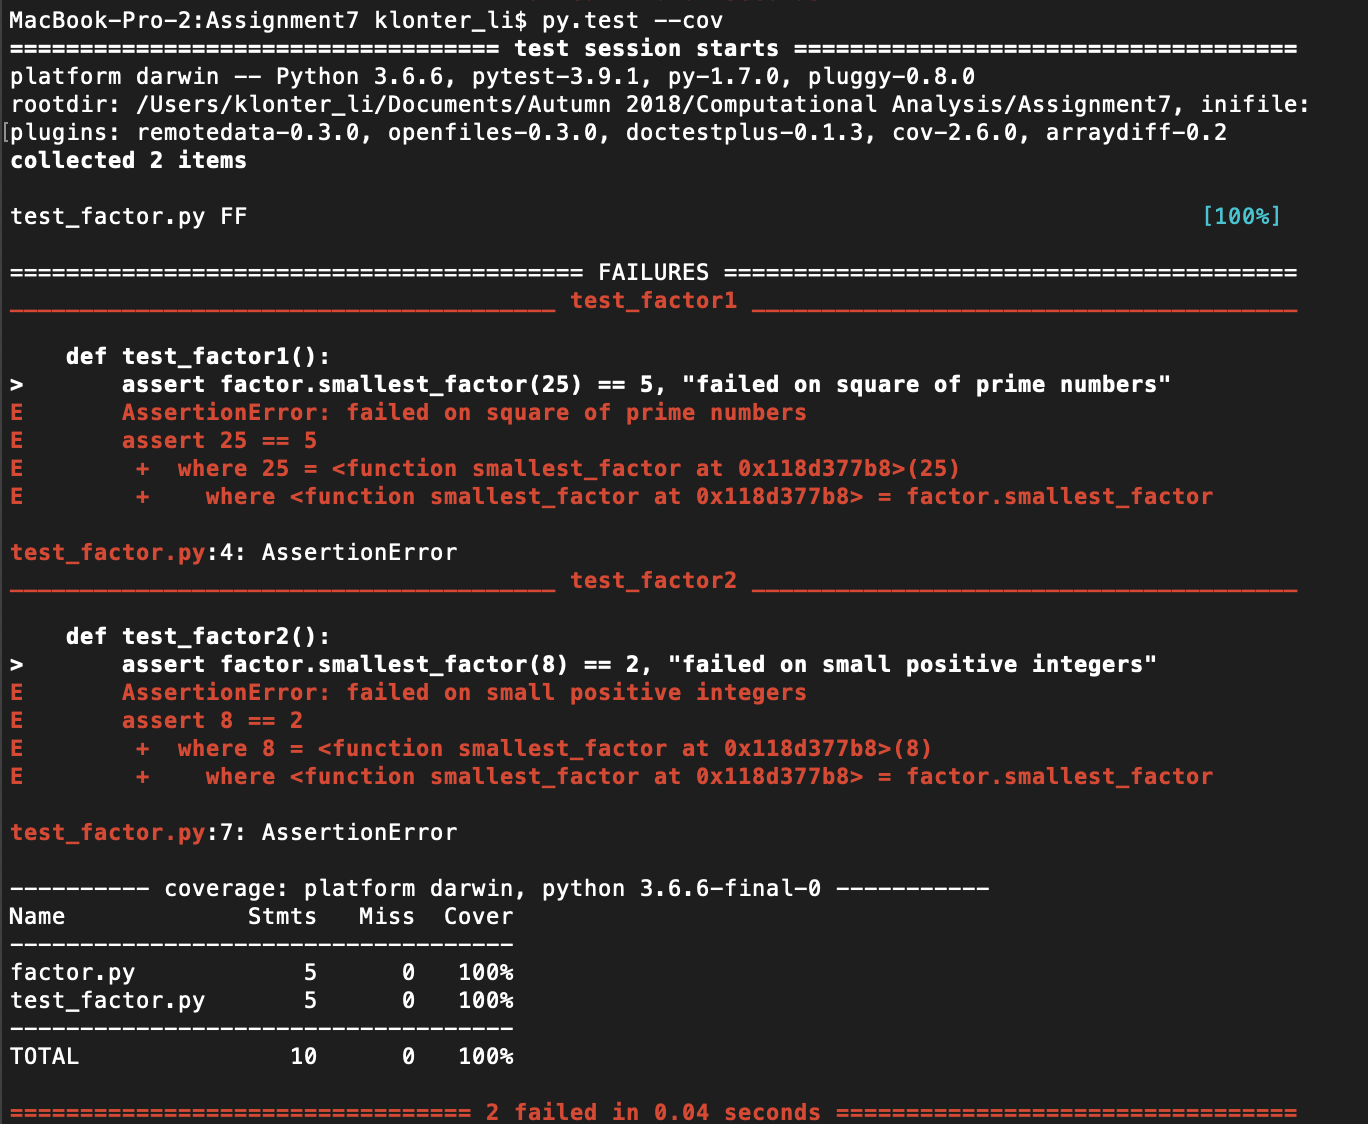

In [13]:
from IPython.display import Image
Image(filename = 'FactorCov.png')

As we can see from above, the coverage is 100% for both the function file and the test file.

First, I save the function into month_lenth.py as following:

In [14]:
def month_length(month, leap_year=False):
    """Return the number of days in the given month."""
    if month in {"September", "April", "June", "November"}:
        return 30
    elif month in {"January", "March", "May", "July", "August", "October", "December"}:
        return 31
    if month == "February":
        if not leap_year:
            return 28
        else:
            return 29
    else:
        return None

Then, I wrote the test file test_month.py as following:

In [15]:
import month_lenth

def test_length():
    assert month_lenth.month_length('September') == 30
    assert month_lenth.month_length('January') == 31
    assert month_lenth.month_length('February') == 28
    assert month_lenth.month_length('February', leap_year = True) == 29
    assert month_lenth.month_length('foo') == None

As we can see from below, the coverage is 100%.

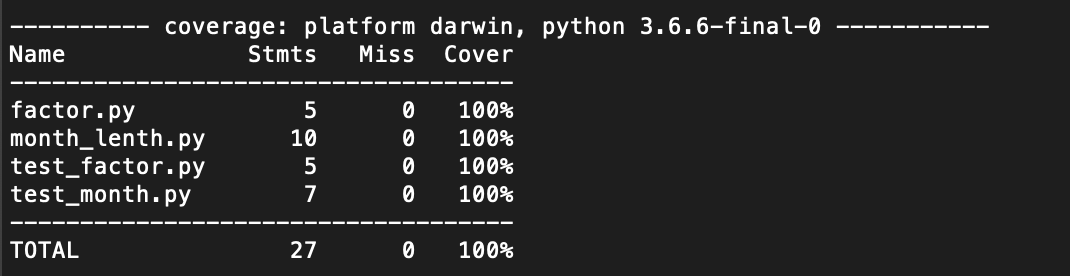

In [16]:
from IPython.display import Image
Image(filename = 'MonthCov.png')

### Problem 3

First, I save the function into operate.py as following:

In [18]:
def operate(a, b, oper):
    """Apply an arithmetic operation to a and b."""
    if type(oper) is not str:
        raise TypeError("oper must be a string")
    elif oper == '+':
        return a + b
    elif oper == '-':
        return a - b
    elif oper == '*':
        return a * b
    elif oper == '/':
        if b == 0:
            raise ZeroDivisionError("division by zero is undefined")
        return a / b
    raise ValueError("oper must be one of '+', '/', '-', or '*'")

Then, I wrote the test file test_operate.py as following:

In [19]:
import operate
import pytest

def test_operate():
    assert operate.operate(1, 2, '+') == 3, "add error"
    assert operate.operate(2, 1, '-') == 1, "minus error"
    assert operate.operate(2, 1, '*') == 2, "multiplication error"
    assert operate.operate(4, 2, '/') == 2, "division error"
    with pytest.raises(TypeError) as excinfo1:
        operate.operate(2, 1, 1)
    assert excinfo1.value.args[0] == "operator must be a string"

def test_operate2():
    with pytest.raises(ZeroDivisionError) as excinfo2:
        operate.operate(2, 0, '/')
    assert excinfo2.value.args[0] == "denominator cannot be zero"

def test_operate3():
    with pytest.raises(ValueError) as excinfo3:
        operate.operate(4, 0, 'foo')
    assert excinfo3.value.args[0] == "operator must be one of '+', '/', '-', and '*'"

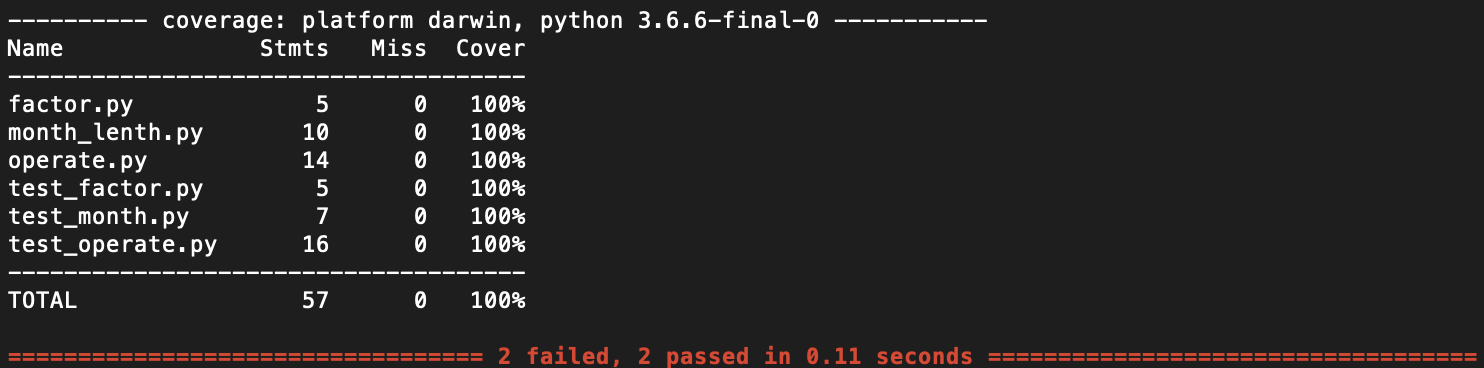

In [23]:
from IPython.display import Image
Image(filename = 'OperateCov.png')

The cov-report tool can generate a html report for the test.

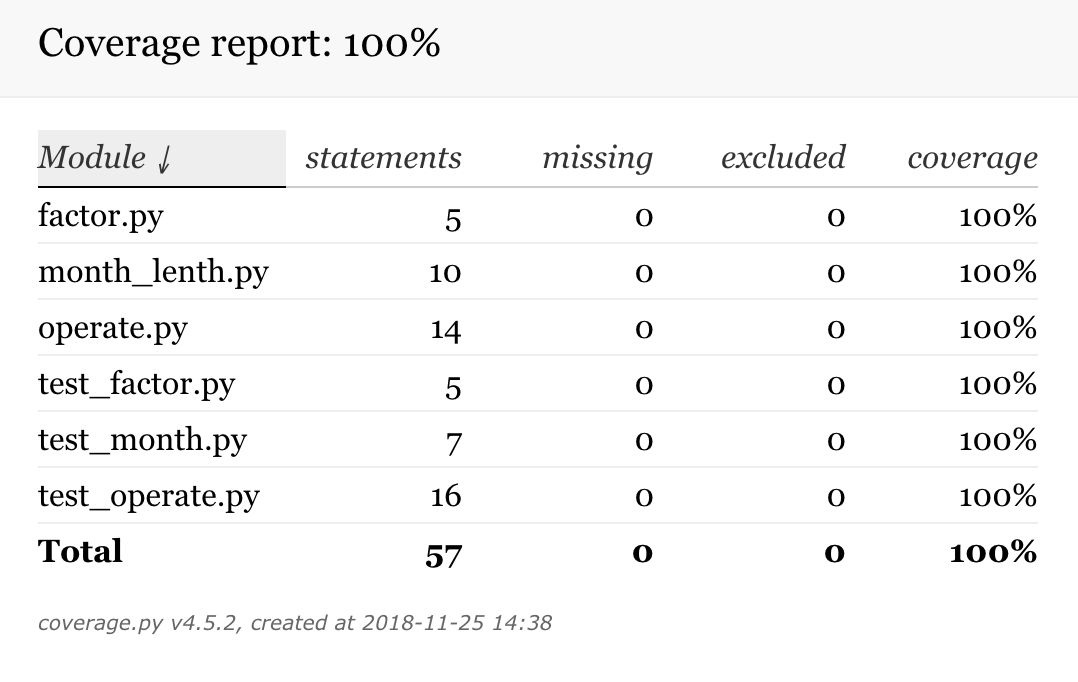

In [24]:
Image(filename = 'HTMLReport.png')

## 2. Test Driven Development

The Python code is the following:

In [25]:
import numpy as np

def get_r(K, L, alpha, Z, delta):
    '''This function generates the interest rate or vector of interest rates'''
    assert alpha > 0 and alpha < 1, "Capital share of income out of range"
    assert delta >= 0 and delta < 1, "Depreciation rate out of range"
    assert Z > 0, "Total factor productivity out of range"

    r = alpha * Z * ((L / K) ** (1 - alpha)) - delta

    if type(K) == float and type(L) == float:
        assert type(r) == float, "If K and L are both scalars, this function should return a scalar interest rate"

    if not np.isscalar(K) and not np.isscalar(L) :
        assert not np.isscalar(r), "If K and L are both vectors, this function should return a corresponding vector of interest rates"

    return r

The py.test --cov shows the following:

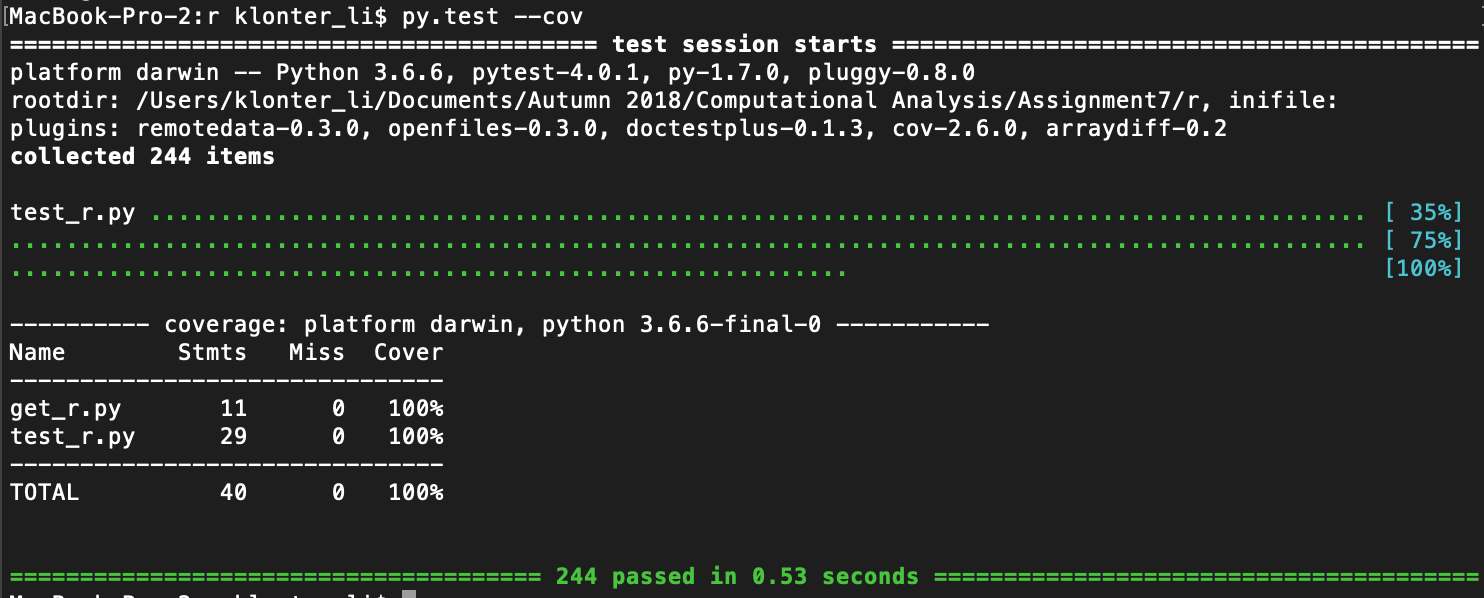

In [26]:
Image(filename = 'RCov.png')